# Facial Recognition Using SVM
#### Author: Miguel Martinez

In [1]:
# import libraries
import numpy as np
import pandas as pd

# for drawing images on screen
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib	inline

from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


#### Read in Oivetti database of face images from AT&T research	lab

In [2]:
# read labels
y = pd.read_csv('Face/label.csv', squeeze=True)

(64, 64)
Flattened: (4096,)
Transposed: (4096,)
Reshaped: (1, 4096)
[[186 183 179 ...,   9   3   5]]


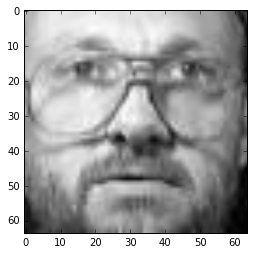

In [3]:
# Show Sample Image
img = mpimg.imread('Face/0.jpg')
plt.imshow(img, cmap=plt.cm.gray)

print(img.shape)

flat = img.flatten()
print('Flattened:', flat.shape)

transposed = np.transpose(flat)
print('Transposed:', transposed.shape)

reshaped = np.reshape(flat, (1,4096))
print('Reshaped:', reshaped.shape)


flat = np.append(flat, flat, axis=0)
#print(flat.shape)

print(reshaped)

In [4]:
# empty np array to hold features matrix
features = np.empty([0,4096])

pathToImage = 'Face/'

# build features matrix
for i in range(400):
    
    # read image
    img = mpimg.imread(pathToImage + str(i) + '.jpg')
    img = img.flatten().reshape(1,4096)
    
    features = np.concatenate([features,img])

print(features.shape)
features


(400, 4096)


array([[ 186.,  183.,  179., ...,    9.,    3.,    5.],
       [ 204.,  198.,  194., ...,  120.,  164.,  167.],
       [  86.,   79.,   82., ...,  189.,  185.,  141.],
       ..., 
       [ 163.,  177.,  193., ...,   44.,   48.,   53.],
       [ 145.,  147.,  151., ...,  132.,  114.,  117.],
       [  91.,   74.,   66., ...,   75.,   44.,   46.]])

In [5]:
# scale features with zero mean and unit std. deviation
preprocessing.scale(features, copy=False)
features

array([[ 1.37649641,  1.11885303,  0.79610373, ..., -1.17094622,
        -1.24726506, -1.21711982],
       [ 1.68113398,  1.3654141 ,  1.03570156, ...,  0.68710075,
         1.48558299,  1.58234648],
       [-0.31593455, -0.59063704, -0.75329558, ...,  1.84210291,
         1.84204144,  1.13304942],
       ..., 
       [ 0.98723729,  1.02022861,  1.01972837, ..., -0.58507555,
        -0.48342554, -0.38764832],
       [ 0.68259971,  0.52710647,  0.34885444, ...,  0.88797069,
         0.63687242,  0.71831368],
       [-0.231313  , -0.67282406, -1.0088666 , ..., -0.06616154,
        -0.55132239, -0.50861291]])

In [6]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.25, random_state=5)

In [7]:
pca = PCA(n_components=50)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


print('Training:', X_train_pca.shape)
print('Testing:',X_test_pca.shape)


Training: (300, 50)
Testing: (100, 50)


In [8]:
# 0.86 accuracy without PCA
clf = SVC(C=1, kernel='rbf', gamma=0.0005, random_state=1)
clf.fit(X_train, y_train)
y_predict_svm = clf.predict(X_test)

score_svm = accuracy_score(y_test, y_predict_svm)
print(score_svm)


0.86


In [9]:
# Accuracy with on PCA 
clf = SVC(C=1, kernel='rbf', gamma=0.0005, random_state=1)
clf.fit(X_train_pca, y_train)
y_predict_svm = clf.predict(X_test_pca)

score_svm = accuracy_score(y_test, y_predict_svm)
print(score_svm)

0.91


In [10]:
cm_SVM = metrics.confusion_matrix(y_test, y_predict_svm)
print("Confusion matrix:")
print(cm_SVM)

Confusion matrix:
[[3 0 0 ..., 0 0 0]
 [0 3 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 4 0]
 [0 0 0 ..., 0 0 1]]


In [11]:
# Combine Training and Testing Data Set post-PCA

X_pca = np.concatenate([X_train_pca, X_test_pca])
print(X_pca.shape)

y_pca = np.concatenate([y_train, y_test])
print(y_pca.shape)

(400, 50)
(400,)


In [12]:
c_options = [0.1,1,10,100,1e3,5e3,1e4,5e4,1e5]

# create a dictionary for grid parameter:
param_grid = dict(C = c_options)
print(param_grid,'\n')

# instantiate the model:
my_SVM = SVC(kernel='rbf', gamma=0.0005, random_state=1)

# create the grid, and define the metric for evaluating the model: 
grid = GridSearchCV(my_SVM, param_grid, cv=10, scoring='accuracy', n_jobs=8)

# fit the grid (start the grid search):
grid.fit(X_pca, y_pca)

# view the results:
#print(grid.cv_results_)

# view the best results corresponding to the best structure of SVM:
print('BEST Accuracy:', grid.best_score_)
print('BEST Number C option:', grid.best_params_)

{'C': [0.1, 1, 10, 100, 1000.0, 5000.0, 10000.0, 50000.0, 100000.0]} 

BEST Accuracy: 0.96
BEST Number C option: {'C': 1}
